In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer

def cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    skf = StratifiedKFold(n_splits=n_folds, random_state=None, shuffle=shuffle)
    y_pred = y.copy()
    score = 0.0
    count = 0
    for train_index, test_index in skf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index],  y.iloc[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        score = score + clf.score(X_test, y_test)
        count += 1
    score = score/count
    return score

data = pd.read_csv('motality_features_1.csv')
icustay = pd.read_csv('ICUSTAYS.csv')
icustay = icustay.rename(columns={"SUBJECT_ID": "subject_id", "HADM_ID": "hadm_id","INTIME":"intime","OUTTIME":"outtime"})
data = pd.merge(data, icustay, on=["subject_id", "hadm_id"],how="inner")


#ad_type = pd.get_dummies(data["admission_type"])
#data = pd.get_dummies(data = data, columns = ["admission_type"])
#data["admission_type_ELECTIVE"] = data["admission_type_ELECTIVE"].astype('category').cat.codes
#data["admission_type_EMERGENCY"] = data["admission_type_EMERGENCY"].astype('category').cat.codes
#data["admission_type_URGENT"] = data["admission_type_URGENT"].astype('category').cat.codes
#data = data[["hadm_id","subject_id","age","admission_type_ELECTIVE","admission_type_EMERGENCY","admission_type_URGENT","item220045","item220739","item223761","item223900","item223901","item226559",
#            "item50821","item50882","item50971","item50983","item51006","item51301","intime","outtime"]]

data = data[["hadm_id","subject_id","age","item220045","item220739","item223761","item223900","item223901","item226559",
            "item50821","item50882","item50971","item50983","item51006","item51301","intime","outtime"]]
data["outtime"] =  pd.to_datetime(data["outtime"])
data["intime"] =  pd.to_datetime(data["intime"])
data["los"] = data["outtime"] - data["intime"]
data["los"] = data["los"]/pd.Timedelta(days=1)
data = data[data["los"].notnull()]
#data["los"] = Binarizer(threshold=5).fit_transform(data["los"].to_numpy().reshape(-1, 1))
kb = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans')
data["los"] = kb.fit_transform(data["los"].to_numpy().reshape(-1, 1))
data = data[["hadm_id","subject_id","age","item220045","item220739","item223761","item223900","item223901","item226559",
            "item50821","item50882","item50971","item50983","item51006","item51301","los"]]
print(data.head(10))
print(kb.bin_edges_)
#temp = data[data["hospital_expire_flag"] == True]
#print(data[data["hospital_expire_flag"] == True].count() )
#data = data[data["hospital_expire_flag"] == False].iloc[:10000,:]
#data = pd.concat([data,temp])
print(data[data["los"] == 0.0].count() )
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(data[data["los"] == 1.0].count() )
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(data[data["los"] == 2.0].count() )
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

   hadm_id  subject_id  age  item220045  item220739  item223761  item223900  \
0   138082       64336   82         104           1          97           1   
1   149888         806   84          63           4          97           5   
2   164788       22599   69          71           1         100           1   
3   129749       98588  300          88           1          97           1   
4   116394       82736   72          80           2          97           1   
5   103149       25912   80          64           1          98           1   
6   185410       79862   61         102           2          98           2   
7   185410       79862   61         102           2          98           2   
8   170506        7908   46         102           1          98           1   
9   199202       31139   61          92           4         100           5   

   item223901  item226559  item50821  item50882  item50971  item50983  \
0           1         175        328         27          

       age  item220045  item220739  item223761  item223900  item223901  \
22854   53         101           3          98           1           6   
20536   84          62           1          99           1           3   
9407    63          98           4          98           5           6   
18397   63          64           4          96           5           6   
25212   37          79           4          97           5           6   
25322   52          63           3          97           1           6   
8531    61          65           1          94           1           2   
24544   31         109           4          96           5           6   
15391   72          77           2          93           1           4   
26438   77          96           1          98           1           4   

       item226559  item50821  item50882  item50971  item50983  item51006  \
22854         400        107         30          4        142         36   
20536          60        242     

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to conve

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


~~~~~~~~~~~~~~~~~~~~~~~~
0.6644936325045482
DONE
~~~~~~~~~~~~~~~~~~~~~~~~
0.6181018799272286
DONE


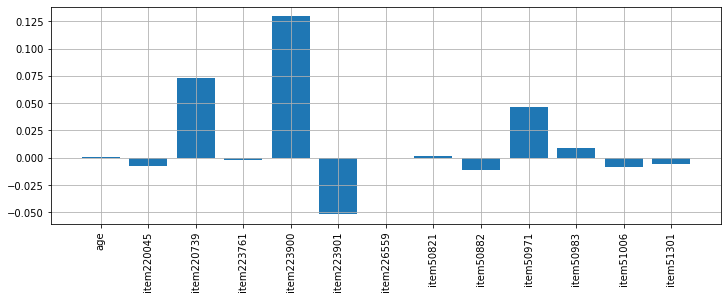

In [50]:
train, test = train_test_split(data, test_size=0.2, random_state=733)

X_train, y_train = train.iloc[:, 2:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, 2:-1], test.iloc[:, -1]
feature_names = list(X_train)
print(X_train.head(10))
print(feature_names)

# rescale
#scaler = MinMaxScaler()
#X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=feature_names)
#X_test = pd.DataFrame(data=scaler.transform(X_test), columns=feature_names)

lr = LogisticRegressionCV().fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print(lr_score)
print("DONE")
print("~~~~~~~~~~~~~~~~~~~~~~~~")
plt.rcParams['figure.figsize'] = [12,4]
def explain_logistic_regression(lr, feature_names):
    # --- Write your code below ---
    fig, ax1 = plt.subplots()
    ax1.bar( x = feature_names, height = lr.coef_[0])
    ax1.set_xticklabels(labels = feature_names, rotation=90)
    ax1.grid()
    
# explain the model
explain_logistic_regression(lr, feature_names)
#X, y = data.iloc[:, 2:-1], data.iloc[:, -1]
#gb_score = cv(X, y, LogisticRegression)
#print(gb_score)
mlp = RandomForestClassifier().fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)
print(mlp_score)
print("DONE")

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer

def cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    skf = StratifiedKFold(n_splits=n_folds, random_state=None, shuffle=shuffle)
    y_pred = y.copy()
    score = 0.0
    count = 0
    for train_index, test_index in skf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index],  y.iloc[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        score = score + clf.score(X_test, y_test)
        count += 1
    score = score/count
    return score

data = pd.read_csv('motality_features_1.csv')
icustay = pd.read_csv('ICUSTAYS.csv')
icustay = icustay.rename(columns={"SUBJECT_ID": "subject_id", "HADM_ID": "hadm_id","INTIME":"intime","OUTTIME":"outtime", "FIRST_CAREUNIT":"first_careunit"})
data = pd.merge(data, icustay, on=["subject_id", "hadm_id"],how="inner")


icu_type = pd.get_dummies(data["first_careunit"])
print(icu_type)
data = pd.get_dummies(data = data, columns = ["first_careunit"])
data["first_careunit_CCU"] = data["first_careunit_CCU"].astype('category').cat.codes
data["first_careunit_CSRU"] = data["first_careunit_CSRU"].astype('category').cat.codes
data["first_careunit_MICU"] = data["first_careunit_MICU"].astype('category').cat.codes
data["first_careunit_SICU"] = data["first_careunit_SICU"].astype('category').cat.codes
data["first_careunit_TSICU"] = data["first_careunit_TSICU"].astype('category').cat.codes
#data = data[["hadm_id","subject_id","age","admission_type_ELECTIVE","admission_type_EMERGENCY","admission_type_URGENT","item220045","item220739","item223761","item223900","item223901","item226559",
#            "item50821","item50882","item50971","item50983","item51006","item51301","intime","outtime"]]

data = data[["hadm_id","subject_id","age","item220045","item220739","item223761","item223900","item223901","item226559",
            "item50821","item50882","item50971","item50983","item51006","item51301","first_careunit_CCU","first_careunit_CSRU","first_careunit_MICU","first_careunit_SICU","first_careunit_TSICU","intime","outtime"]]
data["outtime"] =  pd.to_datetime(data["outtime"])
data["intime"] =  pd.to_datetime(data["intime"])
data["los"] = data["outtime"] - data["intime"]
data["los"] = data["los"]/pd.Timedelta(days=1)
data = data[data["los"].notnull()]
#data["los"] = Binarizer(threshold=5).fit_transform(data["los"].to_numpy().reshape(-1, 1))
kb = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans')
data["los"] = kb.fit_transform(data["los"].to_numpy().reshape(-1, 1))
data = data[["hadm_id","subject_id","age","item220045","item220739","item223761","item223900","item223901","item226559",
            "item50821","item50882","item50971","item50983","item51006","item51301","first_careunit_CCU","first_careunit_CSRU","first_careunit_MICU","first_careunit_SICU","first_careunit_TSICU","los"]]
print(data.head(10))
print(kb.bin_edges_)
#temp = data[data["hospital_expire_flag"] == True]
#print(data[data["hospital_expire_flag"] == True].count() )
#data = data[data["hospital_expire_flag"] == False].iloc[:10000,:]
#data = pd.concat([data,temp])
print(data[data["los"] == 0.0].count() )
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(data[data["los"] == 1.0].count() )
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(data[data["los"] == 2.0].count() )
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

       CCU  CSRU  MICU  SICU  TSICU
0        0     1     0     0      0
1        1     0     0     0      0
2        0     1     0     0      0
3        0     1     0     0      0
4        0     1     0     0      0
...    ...   ...   ...   ...    ...
32977    0     1     0     0      0
32978    1     0     0     0      0
32979    0     0     1     0      0
32980    0     1     0     0      0
32981    0     0     1     0      0

[32982 rows x 5 columns]
   hadm_id  subject_id  age  item220045  item220739  item223761  item223900  \
0   138082       64336   82         104           1          97           1   
1   149888         806   84          63           4          97           5   
2   164788       22599   69          71           1         100           1   
3   129749       98588  300          88           1          97           1   
4   116394       82736   72          80           2          97           1   
5   103149       25912   80          64           1          98     

       age  item220045  item220739  item223761  item223900  item223901  \
22854   53         101           3          98           1           6   
20536   84          62           1          99           1           3   
9407    63          98           4          98           5           6   
18397   63          64           4          96           5           6   
25212   37          79           4          97           5           6   
25322   52          63           3          97           1           6   
8531    61          65           1          94           1           2   
24544   31         109           4          96           5           6   
15391   72          77           2          93           1           4   
26438   77          96           1          98           1           4   

       item226559  item50821  item50882  item50971  item50983  item51006  \
22854         400        107         30          4        142         36   
20536          60        242     

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


~~~~~~~~~~~~~~~~~~~~~~~~
0.6644936325045482
DONE
~~~~~~~~~~~~~~~~~~~~~~~~


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6232565191024864
DONE


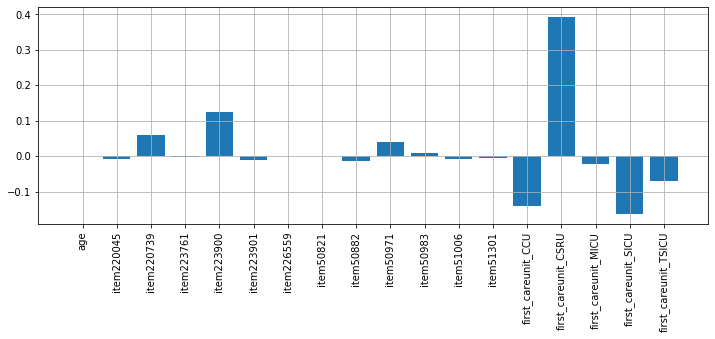

In [22]:
train, test = train_test_split(data, test_size=0.2, random_state=733)

X_train, y_train = train.iloc[:, 2:-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, 2:-1], test.iloc[:, -1]
feature_names = list(X_train)
print(X_train.head(10))
print(feature_names)

# rescale
#scaler = MinMaxScaler()
#X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=feature_names)
#X_test = pd.DataFrame(data=scaler.transform(X_test), columns=feature_names)

lr = LogisticRegressionCV(solver='liblinear').fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print(lr_score)
print("DONE")
print("~~~~~~~~~~~~~~~~~~~~~~~~")
plt.rcParams['figure.figsize'] = [12,4]
def explain_logistic_regression(lr, feature_names):
    # --- Write your code below ---
    fig, ax1 = plt.subplots()
    ax1.bar( x = feature_names, height = lr.coef_[0])
    ax1.set_xticklabels(labels = feature_names, rotation=90)
    ax1.grid()
    
# explain the model
explain_logistic_regression(lr, feature_names)
#X, y = data.iloc[:, 2:-1], data.iloc[:, -1]
#gb_score = cv(X, y, LogisticRegression)
#print(gb_score)
mlp = RandomForestClassifier().fit(X_train, y_train)
mlp_score = mlp.score(X_test, y_test)
print(mlp_score)
print("DONE")